In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1, style="whitegrid", rc={'figure.figsize':(18,10)})
from datetime import timedelta

# Проект e-commerce


In [2]:
customer = pd.read_csv('olist_customers_dataset.csv')
customer.head(3) #таблица с уникальными идентификаторами пользователей

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [3]:
customer.customer_id.nunique()

99441

In [4]:
customer.customer_unique_id.nunique()

96096

In [5]:
customer.shape

(99441, 5)

In [6]:
item = pd.read_csv('olist_order_items_dataset.csv')
item.head(3) #товарные позиции, входящие в заказы

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [7]:
item.order_id.nunique()

98666

In [8]:
item.shape

(112650, 7)

In [9]:
order=pd.read_csv('olist_orders_dataset.csv')
order.head(3) #таблица заказов

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [10]:
order.shape

(99441, 8)

In [11]:
order.order_id.nunique()

99441

In [12]:
order.customer_id.nunique()

99441

# 1. Сколько у нас пользователей, которые совершили покупку только один раз? 


Соединим customer и order в один датафрейм по customer_id и отберем нужные колонки для дальнецшего анализа

In [13]:
customer_order = customer.merge(order, how='inner', on='customer_id')
customer_order=customer_order[['customer_id', 'customer_unique_id', 'order_id', 'order_status', 'order_purchase_timestamp']]
customer_order

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33


In [14]:
customer_order.order_status.unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

Исходя из описания данных, возьмем заказы со статусом delivered, shipped, processing. 
Будем считать, что они оплачены и не отменены на данный момент

Отберем нужные статусы
Сгруппируем уникальных пользователей и посчитаем, сколько транзакций было совершено каждым
Переименуем колонку из customer_id в num_of_orders, чтобы было понятно, что это в результате за колонка
Сортировка, чтобы убедиться, что были юзеры с заказами >1 (можно и без этого шага, но я сделала для проверки)
Отфильтруем пользователей с 1 заказом


In [15]:
customer_order.query('order_status==["delivered", "processing", "shipped"]').groupby('customer_unique_id', as_index=False)\
            .agg({'customer_id':'count'})\
            .rename(columns={'customer_id':'num_of_orders'})\
            .sort_values('num_of_orders', ascending=False)\
            .query('num_of_orders==1')

,customer_unique_id,num_of_orders
63343,aaf4524283dd8ca4c10416322ffcc499,1
64443,adf6e13fe35d4626f4b6654c2fa99f71,1
63294,aadb965c28e1d3e9933c689da0ee5dff,1
63303,aae296875a5380b09f3785a729183ff2,1
64461,ae00eb90b34f0bee0b8084c6a22b6fe6,1
...,...,...
32020,56546b71f8bf254f860014fae431af6d,1
32018,565427a96f0865bacef2a6b400197b46,1
32017,565283fe12fa1a894ef451c4bfb391ed,1
32016,5650e95cbd234d30d80befa7c4ab1618,1


Ответ 91814 из 96096 уникальных пользователей совершили покупку 1 раз

# Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

За недоставленные заказы возьмем canceled (недоставлены по причине отмены) и 
unavailable (недоставлены по причине недоступности товара), остальные статусы не значат, что товар точно не будет доставлен
Здесь можно взять таблицу order, так как нас интересует только статус заказа

In [16]:
undelivered = order.query('order_status==["canceled", "unavailable"]')[['order_id', 'order_status', 'order_purchase_timestamp']]
undelivered

,order_id,order_status,order_purchase_timestamp
266,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16 15:09:28
397,1b9ecfe83cdc259250e1a8aca174f0ad,canceled,2018-08-04 14:29:27
586,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31 11:31:37
613,714fb133a6730ab81fa1d3c1b2007291,canceled,2018-01-26 21:34:08
687,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14 17:38:02
...,...,...,...
99252,aaab15da689073f8f9aa978a390a69d1,unavailable,2018-01-16 14:27:59
99283,3a3cddda5a7c27851bd96c3313412840,canceled,2018-08-31 16:13:44
99347,a89abace0dcc01eeb267a9660b5ac126,canceled,2018-09-06 18:45:47
99348,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23 16:28:04


In [17]:
undelivered.dtypes #колонка с датой в формате object, нужно изменить на временной формат

order_id                    object
order_status                object
order_purchase_timestamp    object
dtype: object

In [18]:
undelivered['order_purchase_timestamp'] = pd.to_datetime(undelivered['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')

In [19]:
undelivered.dtypes #теперь нужная колонка в формате даты, это понадобится нам для извлечения месяцев

order_id                            object
order_status                        object
order_purchase_timestamp    datetime64[ns]
dtype: object

In [20]:
undelivered['date']=undelivered['order_purchase_timestamp'].dt.strftime('%Y-%m') #колонка date включает в себя год и месяц

посмотрим сколько заказов отменялось или не было в наличии по месяцам каждого года,
переименуем order_id на undelivered_orders, чтобы было понятно, что отражает эта колонка,
еще раз группируем по статусу и считаем среднее


In [21]:
undelivered.groupby(['order_status', 'date'], as_index=False)\
        .agg({'order_id':'count'})\
        .rename(columns={'order_id':'undelivered_orders'})\
        .groupby('order_status', as_index=False)\
        .agg({'undelivered_orders':'mean'})\
        .round() 

,order_status,undelivered_orders
0,canceled,26.0
1,unavailable,29.0


Ответ: в среднем в месяц по причине отмены (canceled) не доставлялось 26 заказов, 
а по причине недоступности товара (unavailable) - 29 заказов.

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается.

In [22]:
item.product_id

0         4244733e06e7ecb4970a6e2683c13e61
1         e5f2d52b802189ee658865ca93d83a8f
2         c777355d18b72b67abbeef9df44fd0fd
3         7634da152a4610f1595efa32f14722fc
4         ac6c3623068f30de03045865e4e10089
                        ...               
112645    4aa6014eceb682077f9dc4bffebc05b0
112646    32e07fd915822b0765e448c4dd74c828
112647    72a30483855e2eafc67aee5dc2560482
112648    9c422a519119dcad7575db5af1ba540e
112649    350688d9dc1e75ff97be326363655e01
Name: product_id, Length: 112650, dtype: object

In [23]:
item.product_id.nunique()

32951

product_id - уникальный товар, по нему будем группировать, item_id не подойдет, так как это номер товара в чеке, а не обозначение уникального товара

In [24]:
item_order = order.merge(item, on='order_id', how='inner') #соединим датасеты с product_id и order_status
item_order.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


исключим отмененные заказы(остальные статусы будем считать как совершенную покупку, так как он явно не отменен 
и потребитель проявил интерес к конкретному товару) + уберем лишние колонки

In [25]:

item_order = item_order.query('order_status!="canceled" and order_status!="unavailable"')[['order_id', 'product_id', 'customer_id', 'order_status', 'order_purchase_timestamp']]
item_order

,order_id,product_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39
...,...,...,...,...,...
112645,63943bddc261676b46f01ca7ac2f7bd8,f1d4ce8c6dd66c47bbaa8c6781c2a923,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58
112646,83c1379a015df1e13d02aae0204711ab,b80910977a37536adeddd63663f916ad,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43
112647,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27
112648,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27


In [26]:
item_order.dtypes 

order_id                    object
product_id                  object
customer_id                 object
order_status                object
order_purchase_timestamp    object
dtype: object

преобразуем колонку order_purchase_timestamp, чтобы достать оттуда день недели

In [27]:
item_order['order_purchase_timestamp'] = pd.to_datetime(item_order['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
item_order['weekday'] = item_order['order_purchase_timestamp'].dt.day_name()

In [28]:
item_order.weekday

0            Monday
1           Tuesday
2         Wednesday
3          Saturday
4           Tuesday
            ...    
112645      Tuesday
112646       Sunday
112647       Monday
112648       Monday
112649     Thursday
Name: weekday, Length: 112101, dtype: object

Группируем данные по product_id и weekday, считаем количество покупок.
Сортируем число покупок по убыванию для каждого товара и удаляем дубликаты

In [29]:
weekday_order = item_order.groupby(['product_id', 'weekday'], as_index=False)\
            .agg({'order_purchase_timestamp':'count'})\
            .rename(columns={'order_purchase_timestamp':'purchase_amount'})\
            .sort_values('purchase_amount', ascending=False)\
            .drop_duplicates('product_id')
weekday_order

,product_id,weekday,purchase_amount
15815,422879e10f46682990de24d770e7f83d,Wednesday,93
36311,99a4788cb24856965c36a24e339b6058,Monday,92
40825,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
20013,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
12932,368c6c730842d78016ad823897a372db,Friday,67
...,...,...,...
23889,642e125cbc752b4eeb8faf442319c39f,Thursday,1
23897,6432d844f2be41bb6f2fd279e23415da,Friday,1
23899,6435535083cf42eb1ce5d96f2c4d3482,Tuesday,1
23900,6435be64ad92f52631170f9a92718a99,Sunday,1


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

In [30]:
customer_order_4 = customer_order.query('order_status==["delivered", "processing", "shipped"]')

Беру датасет из 1 урока и отбираю статусы delivered, shipped, processing

In [31]:
customer_order_4.head(3)

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45


In [32]:
customer_order_4['order_purchase_timestamp'] = pd.to_datetime(customer_order_4['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
customer_order_4['year_month'] = customer_order_4['order_purchase_timestamp'].dt.strftime('%Y-%m')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
customer_order_4

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07
...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11


In [34]:
customer_order_4.isna().sum()

customer_id                 0
customer_unique_id          0
order_id                    0
order_status                0
order_purchase_timestamp    0
year_month                  0
dtype: int64

In [35]:
order_month = customer_order_4.groupby(['customer_unique_id', 'year_month'], as_index=False) \
                .agg({'order_purchase_timestamp':'count'})
order_month

,customer_unique_id,year_month,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
96554,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1
96555,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
96556,ffff371b4d645b6ecea244b27531430a,2017-02,1
96557,ffff5962728ec6157033ef9805bacc48,2018-05,1


In [36]:
order_month.year_month = pd.to_datetime(order_month.year_month, format='%Y-%m')

In [37]:
order_month['days'] = order_month.year_month.dt.days_in_month

Найдем количество недель в месяц

In [38]:
days_week = 7
order_month['weeks_in_month'] = order_month.days/days_week

In [39]:
order_month

,customer_unique_id,year_month,order_purchase_timestamp,days,weeks_in_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,31,4.428571
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,31,4.428571
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,31,4.428571
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,31,4.428571
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,30,4.285714
...,...,...,...,...,...
96554,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1,30,4.285714
96555,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1,31,4.428571
96556,ffff371b4d645b6ecea244b27531430a,2017-02-01,1,28,4.000000
96557,ffff5962728ec6157033ef9805bacc48,2018-05-01,1,31,4.428571


Найдем кол-во заказов в неделю

In [40]:
order_month['orders_per_week']=order_month.order_purchase_timestamp / order_month.weeks_in_month

In [41]:
order_month

,customer_unique_id,year_month,order_purchase_timestamp,days,weeks_in_month,orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-01,1,31,4.428571,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-01,1,31,4.428571,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03-01,1,31,4.428571,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-01,1,31,4.428571,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11-01,1,30,4.285714,0.233333
...,...,...,...,...,...,...
96554,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-01,1,30,4.285714,0.233333
96555,fffea47cd6d3cc0a88bd621562a9d061,2017-12-01,1,31,4.428571,0.225806
96556,ffff371b4d645b6ecea244b27531430a,2017-02-01,1,28,4.000000,0.250000
96557,ffff5962728ec6157033ef9805bacc48,2018-05-01,1,31,4.428571,0.225806


In [42]:
order_month.groupby('customer_unique_id', as_index=False).agg({'orders_per_week':'mean'})

,customer_unique_id,orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.225806
2,0000f46a3911fa3c0805444483337064,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,0.225806
4,0004aac84e0df4da2b147fca70cf8255,0.233333
...,...,...
94681,fffcf5a5ff07b0908bd4e2dbc735a684,0.233333
94682,fffea47cd6d3cc0a88bd621562a9d061,0.225806
94683,ffff371b4d645b6ecea244b27531430a,0.250000
94684,ffff5962728ec6157033ef9805bacc48,0.225806


# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Возьмем таблицу, которая использовалась в предыдущем задании

In [43]:
customer_order_5 = customer_order_4

In [44]:
customer_order_5.head(5)

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,year_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07


In [45]:
customer_order_5.isna().sum() 

customer_id                 0
customer_unique_id          0
order_id                    0
order_status                0
order_purchase_timestamp    0
year_month                  0
dtype: int64

In [46]:
customer_order_5.dtypes

customer_id                         object
customer_unique_id                  object
order_id                            object
order_status                        object
order_purchase_timestamp    datetime64[ns]
year_month                          object
dtype: object

Приведем данные в нужный формат

In [47]:
customer_order_5.order_purchase_timestamp = pd.to_datetime(customer_order_5.order_purchase_timestamp, format = '%Y-%m-%d')


/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [48]:
customer_order_5['cohort'] = customer_order_5.groupby('customer_unique_id').order_purchase_timestamp.transform('min').dt.to_period('M')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
customer_order_5

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,year_month,cohort
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07,2018-07
...,...,...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04,2018-04
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04,2018-04
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04,2018-04
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11,2017-11


In [50]:
customer_order_5.cohort.unique()

<PeriodArray>
['2017-05', '2018-01', '2018-05', '2018-03', '2018-07', '2017-09', '2018-02',
 '2017-11', '2018-04', '2018-08', '2018-06', '2017-08', '2017-10', '2017-04',
 '2017-06', '2017-12', '2017-01', '2017-07', '2017-03', '2017-02', '2016-10',
 '2016-12', '2016-09']
Length: 23, dtype: period[M]

Посмотрим сколько пользователей из какой когорты было активными в разные месяца

In [51]:
customer_cohorsts = customer_order_5.groupby(['cohort', 'year_month'], as_index=False) \
                .agg({'customer_unique_id': 'nunique'})
customer_cohorsts

,cohort,year_month,customer_unique_id
0,2016-09,2016-09,2
1,2016-10,2016-10,272
2,2016-10,2017-04,1
3,2016-10,2017-07,1
4,2016-10,2017-09,1
...,...,...,...
215,2018-06,2018-08,16
216,2018-07,2018-07,6004
217,2018-07,2018-08,31
218,2018-08,2018-08,6187


In [52]:
customer_cohorsts.dtypes

cohort                period[M]
year_month               object
customer_unique_id        int64
dtype: object

In [55]:
customer_cohorsts.year_month = pd.to_datetime(customer_cohorsts.year_month)

In [56]:
from operator import attrgetter
customer_cohorsts['period_number'] = (customer_cohorsts.year_month.dt.to_period('M') - customer_cohorsts.cohort).apply(attrgetter('n'))

In [57]:
customer_cohorsts

,cohort,year_month,customer_unique_id,period_number
0,2016-09,2016-09-01,2,0
1,2016-10,2016-10-01,272,0
2,2016-10,2017-04-01,1,6
3,2016-10,2017-07-01,1,9
4,2016-10,2017-09-01,1,11
...,...,...,...,...
215,2018-06,2018-08-01,16,2
216,2018-07,2018-07-01,6004,0
217,2018-07,2018-08-01,31,1
218,2018-08,2018-08-01,6187,0


Сделаем сводную таблицу, чтобы потом по ней построить heatmap

In [58]:
cohorts_pivot = customer_cohorsts.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'customer_unique_id')
cohorts_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
cohort,,,,,,,,,,,,,,,,,,,,
2016-09,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,272.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,740.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1678.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2568.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,9.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2310.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05,3525.0,17.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,9.0,9.0,12.0,9.0,1.0,7.0,8.0,NaN,NaN,NaN,NaN
2017-06,3094.0,14.0,11.0,12.0,8.0,11.0,11.0,7.0,4.0,7.0,10.0,10.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


In [59]:
cohort_size = cohorts_pivot.iloc[:,0]
retention_matrix = cohorts_pivot.divide(cohort_size, axis = 0)


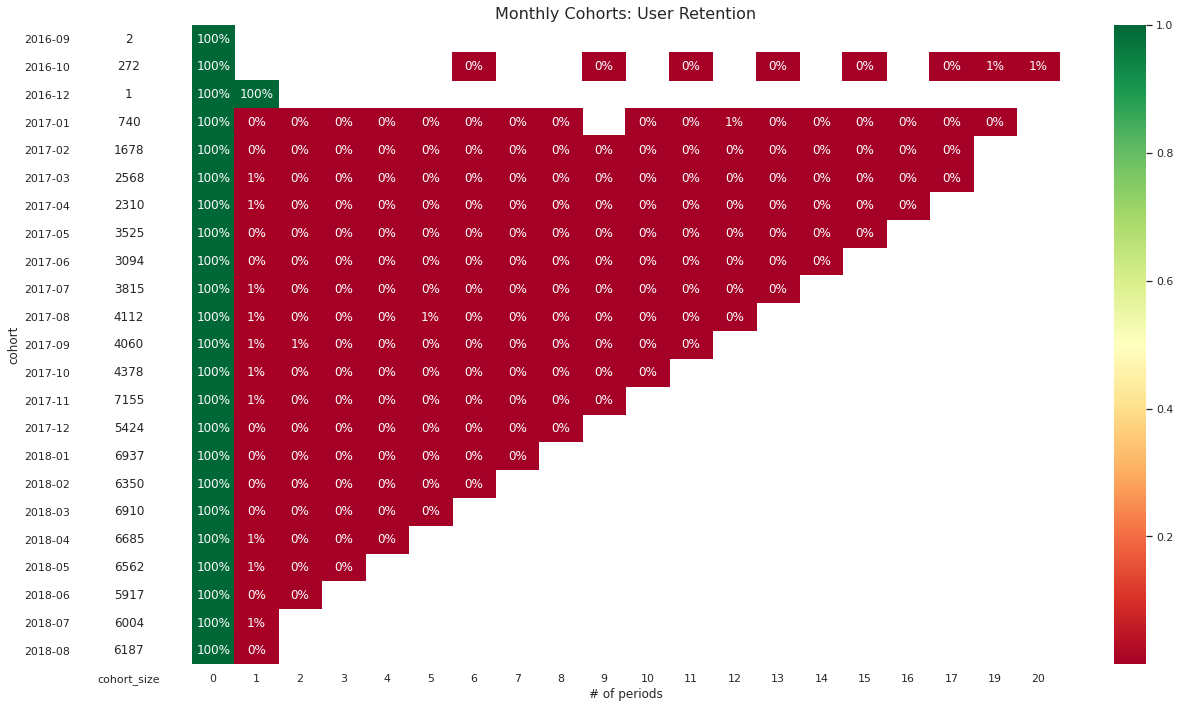

In [60]:
import matplotlib.colors as mcolors
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.

Объединим все датасеты и удалим явно недоставленные заказы

In [61]:
rfm_data = item.merge(order, how='outer', on='order_id')
rfm_data = rfm_data.merge(customer, how='left', on='customer_id')

In [62]:
rfm_data = rfm_data.query('order_status !=["canceled", "unavailable"]')
rfm_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112829,a68ce1686d536ca72bd2dadc4b8671e5,NaN,NaN,NaN,NaN,NaN,NaN,d7bed5fac093a4136216072abaf599d5,shipped,2016-10-05 01:47:40,2016-10-07 03:11:22,2016-11-07 16:37:37,NaN,2016-12-01 00:00:00,f15a952dfc52308d0361288fbf42c7b3,91250,porto alegre,RS
113079,35de4050331c6c644cddc86f4f2d0d64,NaN,NaN,NaN,NaN,NaN,NaN,4ee64f4bfc542546f422da0aeb462853,created,2017-12-05 01:07:58,NaN,NaN,NaN,2018-01-08 00:00:00,10d5890ed5e7ec78a7db23b5ac579b17,93025,sao leopoldo,RS
113098,2ce9683175cdab7d1c95bcbb3e36f478,NaN,NaN,NaN,NaN,NaN,NaN,b2d7ae0415dbbca535b5f7b38056dd1f,invoiced,2016-10-05 21:03:33,2016-10-06 07:46:39,NaN,NaN,2016-11-25 00:00:00,6a2da481aa7827b951175772a0fe8bb8,16012,aracatuba,SP
113103,90ab3e7d52544ec7bc3363c82689965f,NaN,NaN,NaN,NaN,NaN,NaN,7d61b9f4f216052ba664f22e9c504ef1,created,2017-11-06 13:12:34,NaN,NaN,NaN,2017-12-01 00:00:00,161e5b2b4513edb336986a8909218365,87720,paranavai,PR


In [63]:
rfm_data = rfm_data.groupby(['order_id', 'order_purchase_timestamp', 'customer_unique_id'], as_index=False) \
    .agg(total_amount=('price', 'sum'))
rfm_data

,order_id,order_purchase_timestamp,customer_unique_id,total_amount
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,871766c5855e863f6eccc05f988b23cb,58.90
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,eb28e67c4c0b83846050ddfb8a35d051,239.90
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,3818d81c6709e39d06b2738a8d3a2474,199.00
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,af861d436cfc08b2c2ddefd0ba074622,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,64b576fb70d441e8f1b2d7d446e483c5,199.90
...,...,...,...,...
98202,fffc94f6ce00a00581880bf54a75a037,2018-04-23 13:57:06,0c9aeda10a71f369396d0c04dce13a64,299.99
98203,fffcd46ef2263f404302a634eb57f7eb,2018-07-14 10:26:46,0da9fe112eae0c74d3ba1fe16de0988b,350.00
98204,fffce4705a9662cd70adb13d4a31832d,2017-10-23 17:07:56,cd79b407828f02fdbba457111c38e4c4,99.90
98205,fffe18544ffabc95dfada21779c9644f,2017-08-14 23:02:59,eb803377c9315b564bdedad672039306,55.99


Посмотрим на временной период, который мы будем анализировать и создадим условное "сегодня"

In [64]:
rfm_data.order_purchase_timestamp =  pd.to_datetime(rfm_data.order_purchase_timestamp)

In [65]:
from datetime import timedelta
NOW = rfm_data.order_purchase_timestamp.max() + timedelta(days=1)
NOW

Timestamp('2018-09-04 09:06:57')

In [66]:
print(f'Orders from {rfm_data.order_purchase_timestamp.min()} to {rfm_data.order_purchase_timestamp.max()}')

Orders from 2016-09-04 21:15:19 to 2018-09-03 09:06:57


Сгруппируем данные для будущего rfm анализа

In [67]:
rfm = rfm_data.groupby('customer_unique_id', as_index=False) \
        .agg({'order_purchase_timestamp': lambda x: (NOW - x.max()).days,
              'order_id': lambda x: len(x.unique()),
              'total_amount': lambda x: x.sum()}) 

Переименуем колонки

In [68]:
rfm = rfm.rename(columns={'order_purchase_timestamp': 'recency',
                    'order_id': 'frequency',
                    'total_amount': 'monetary'})

In [69]:
rfm

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00
...,...,...,...,...
94985,fffcf5a5ff07b0908bd4e2dbc735a684,452,1,1570.00
94986,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89
94987,ffff371b4d645b6ecea244b27531430a,573,1,89.90
94988,ffff5962728ec6157033ef9805bacc48,124,1,115.00


Для метрики можно взять квантили

In [70]:
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles

,recency,frequency,monetary
0.25,119.0,1.0,47.8825
0.50,224.0,1.0,89.8100
0.75,352.0,1.0,155.0000


In [71]:
quantiles = quantiles.to_dict()
quantiles
rfm.frequency.value_counts()

1     92102
2      2652
3       188
4        29
5         9
6         5
7         3
16        1
9         1
Name: frequency, dtype: int64

Частоту можно разбить по периодам 1 purchase, 2 purchases, 3 purchases, >= 3 purchases

In [72]:
quantiles['frequency'][0.5] = 2
quantiles['frequency'][0.75] = 3
quantiles

{'recency': {0.25: 119.0, 0.5: 224.0, 0.75: 352.0},
 'frequency': {0.25: 1.0, 0.5: 2, 0.75: 3},
 'monetary': {0.25: 47.8825, 0.5: 89.81, 0.75: 155.0}}

In [73]:
def r_score(series, parameter, quantiles):
    if series <= quantiles[parameter][0.25]:
        return 4
    elif series <= quantiles[parameter][0.50]:
        return 3
    elif series <= quantiles[parameter][0.75]: 
        return 2
    else:
        return 1


def f_score(series, parameter, quantiles):
    if series <= quantiles[parameter][0.25]:
        return 1
    elif series <= quantiles[parameter][0.50]:
        return 2
    elif series <= quantiles[parameter][0.75]: 
        return 3
    else:
        return 4


def m_score(series, parameter, quantiles):
    if series <= quantiles[parameter][0.25]:
        return 1
    elif series <= quantiles[parameter][0.50]:
        return 2
    elif series <= quantiles[parameter][0.75]: 
        return 3
    else:
        return 4

In [74]:
rfm['R'] = rfm['recency'].apply(lambda x: r_score(x, 'recency', quantiles))
rfm['F'] = rfm['frequency'].apply(lambda x: f_score(x, 'frequency', quantiles))
rfm['M'] = rfm['monetary'].apply(lambda x: m_score(x, 'monetary', quantiles))

In [75]:
rfm['RFM_Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm[rfm.RFM_Score == '444']

,customer_unique_id,recency,frequency,monetary,R,F,M,RFM_Score
3095,083ca1aa470c280236380973a48f77c6,21,4,218.88,4,4,4,444
3359,08e5b38d7948d37fbb2a59fc5e175ab1,117,4,866.79,4,4,4,444
21339,394ac4de8f3acb14253c177f0e15bc58,19,5,633.16,4,4,4,444
21397,397b44d5bb99eabf54ea9c2b41ebb905,78,4,1650.00,4,4,4,444
29178,4e65032f1f574189fb793bac5a867bbc,81,5,404.57,4,4,4,444
29649,4facc2e6fbc2bffab2fea92d2b4aa7e4,21,4,1686.90,4,4,4,444
36994,6358b15ef7fa9b1210f1a5735cabd3d9,91,4,279.60,4,4,4,444
37165,63cfc61cee11cbe306bff5857d00bfe4,98,6,579.81,4,4,4,444
37374,6469f99c1f9dfae7733b25662e7f1782,68,7,664.20,4,4,4,444
42804,7305430719d715992b00be82af4a6aa8,18,4,364.30,4,4,4,444


In [76]:
segt_map = {
    r'11': 'not active',
    r'[1-2][2-3]': 'at risk',
    r'14': 'can\'t loose',
    r'[2-3][1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[2-3]4': 'loyal customers',
    r'31': 'promising',
    r'4[1-2]': 'new customers',
    r'43': 'potentially loyal',
    r'44': 'champions'
}
rfm['segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['segment'] = rfm['segment'].replace(segt_map, regex=True)

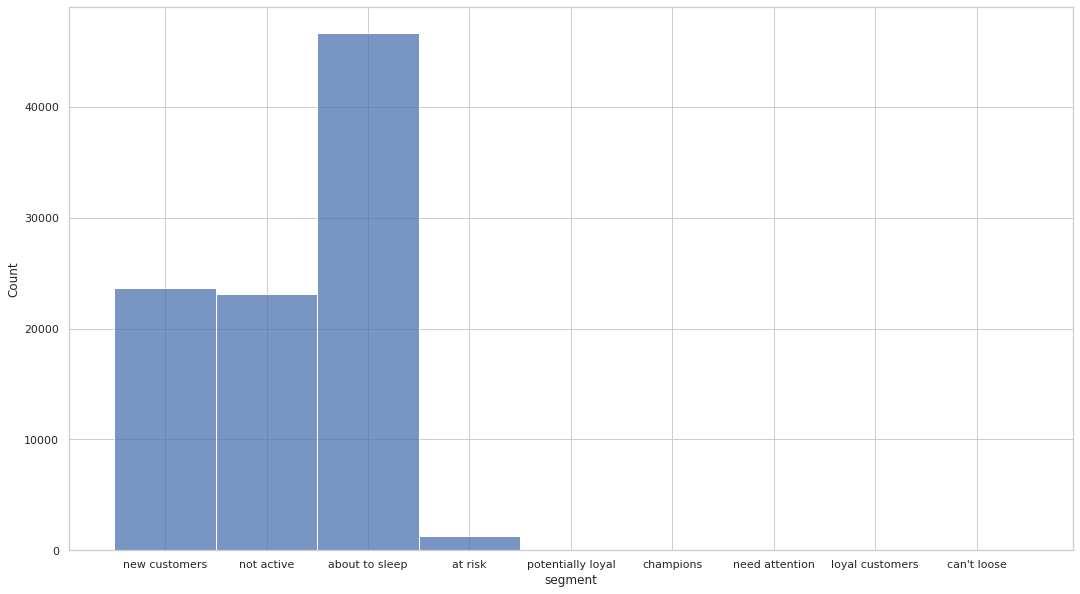

In [77]:
sns.histplot(rfm.segment)

In [78]:
rfm.segment.value_counts()

about to sleep       46709
new customers        23688
not active           23140
at risk               1294
potentially loyal       57
need attention          54
champions               23
loyal customers         21
can't loose              4
Name: segment, dtype: int64

Вывод: мало лояльных клиентов и очень много клиентов с маленькой активностью, вероятно, компании нужно развивать свой продукт, чтобы клиенты оставались заинтересованными.